# CGEM the Notebook
## Testing temperature dependence

## Compile the code

In [1]:
!make

gfortran -o CGEM.exe    singledouble.o sw_adtg.o sw_ptmp.o sw_temp.o p80.o constants.o phsolvers.o varsolver.o depth2press.o rho.o rhoinsitu.o vars.o p2fCO2.o gasx.o date_time.o grid.o cgem.o phyto_growth.o Command_Line_Args.o model_init.o Check_InputFile.o update_grid.o getSolar.o DailyRad_init.o run_cgem.o SDM.o Nitrification.o rnitrate.o reaction.o Q10_T.o MOD_UTILITIES.o calc_solar_zenith.o Call_IOP_PAR.o main.o  


## Import CGEM Python functions

In [2]:
from cgem import *

## Temperature is defined in the grid namelist file

Import both the grid and cgem namelists, and print out grid

In [3]:
import f90nml
from opentea.noob.asciigraph import nob_asciigraph
cgem_nml = f90nml.read('cgem.nml')
cgem = cgem_nml.todict()
grid_nml = f90nml.read('grid.nml')
grid = grid_nml.todict()
grid

OrderedDict([('grid', OrderedDict([('km', 5), ('nospa', 3), ('nospz', 2)])),
             ('time',
              OrderedDict([('iyrs', 2006),
                           ('imons', 1),
                           ('idays', 1),
                           ('ihrs', 18),
                           ('imins', 0),
                           ('isecs', 0),
                           ('iyre', 2006),
                           ('imone', 6),
                           ('idaye', 1),
                           ('ihre', 18),
                           ('imine', 0),
                           ('isece', 0),
                           ('dt', 3600),
                           ('dt_out', 3600),
                           ('lon_in', -92.39),
                           ('lat_in', 29.03),
                           ('depth_in', 20.0),
                           ('s_init', 30.0),
                           ('t_init', 16.0)]))])

## The parameter to change is t_init
The namelist file is called ***grid.nml***.  The *namelist* in that file with `t_init` is called `time`.  (Sorry.  I'll change it in the next 'round'.  Eventually, that will come from SCHISM anyway.)

In [4]:
Temperature = grid.get('time').get('t_init')
Temperature

16.0

## Make a plot of phytoplankton 
With the initial temperature.

Plotting CGEM variable A


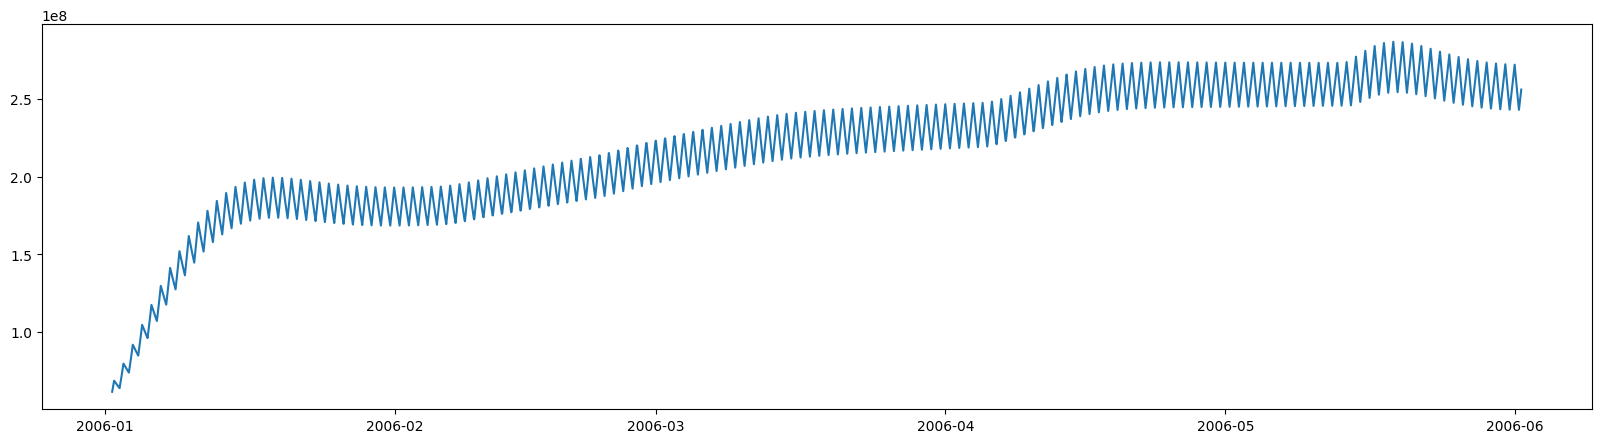

In [6]:
cgem_plot1D(grid,'A')

## Save the variable
We want to change the temperature and see what happens to A, so...

In [8]:
A_t16 = cgem_getvar("A")

Calculating CGEM variable A


## You can edit the file grid.nml directly, or use Python f90nml function to change it
See: http://f90nml.readthedocs.org/en/latest/

In [8]:
Tstart=cgem_tstart(grid)
Tend=cgem_tend(grid)
print(Tstart)
print(Tend)

2006-01-01 18:00:00
2006-06-01 18:00:00


In [9]:
T = cgem_timearray(A,grid)

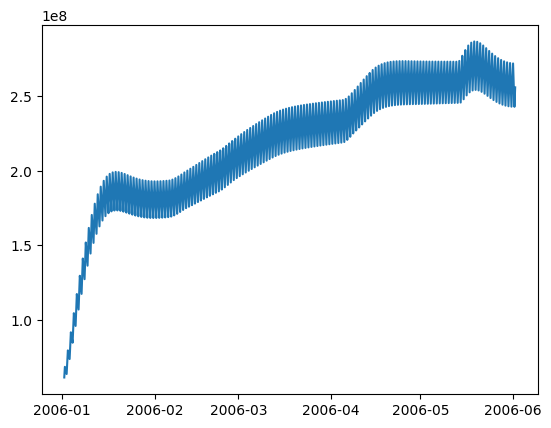

In [10]:
plt.plot(T,A)

## Remember you have to 'get' the variable before getting a time array.  
You can make a plot without time, it will just have the x axis as timesteps

In [11]:
Z = cgem_getvar('Z')
NO3 = cgem_getvar('NO3')
NH4 = cgem_getvar('NH4')
PO4 = cgem_getvar('PO4')

Calculating CGEM variable Z
Calculating CGEM variable NO3
Calculating CGEM variable NH4
Calculating CGEM variable PO4


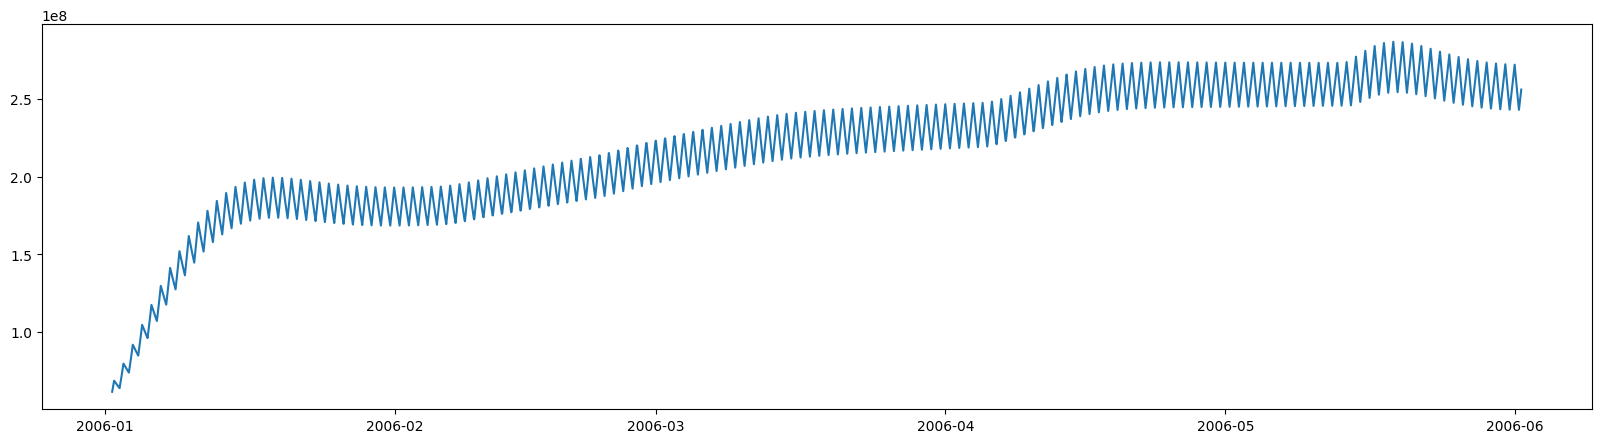

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,A)

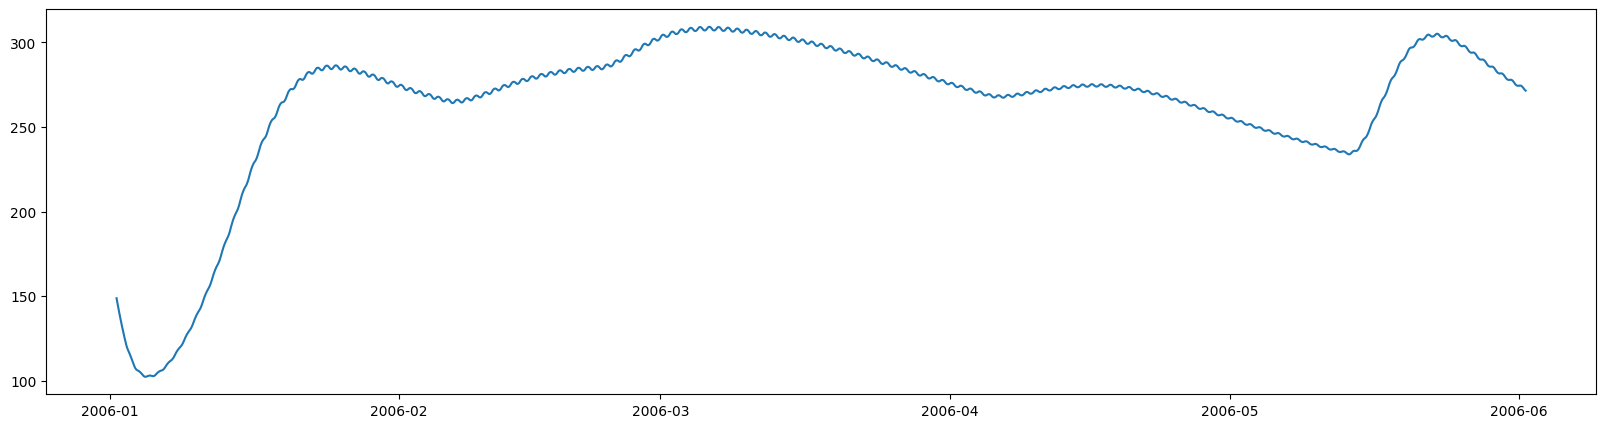

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,Z)

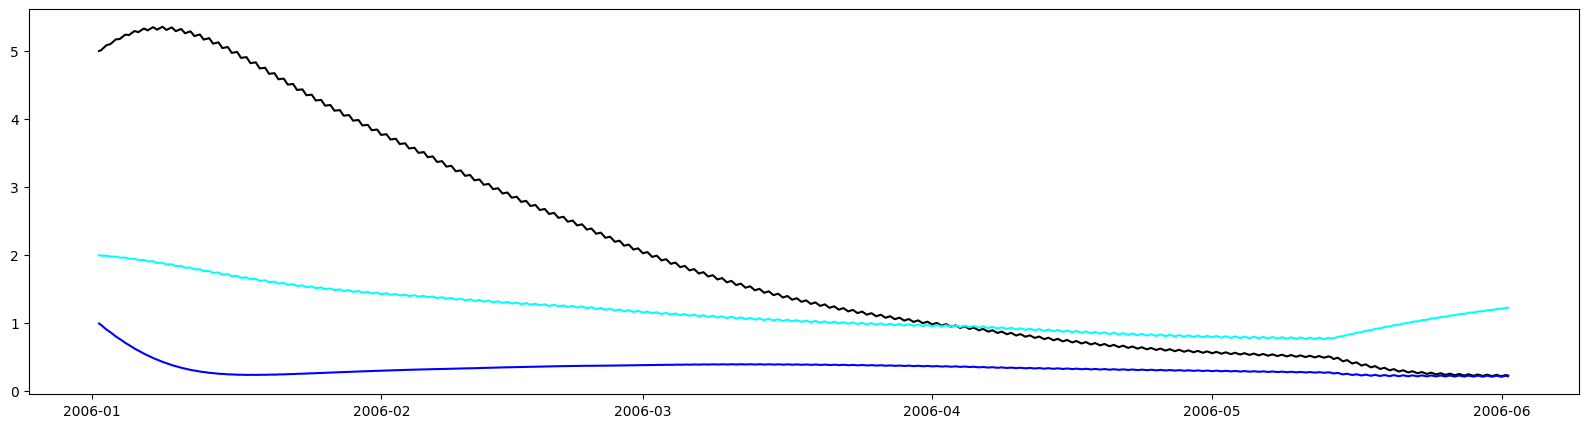

In [14]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,NO3, color='black')
ax.plot(T,NH4, color='blue')
ax.plot(T,PO4, color='cyan')